# Exploring Heart Failure Prediction: Data Analysis and Model Evaluation

## 1. Retrieving and Preparing the Data

In [1]:
# Load necessary libraries, set dataset path, and read it into a DataFrame
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from pandas.plotting import scatter_matrix
heart_data = "DataSets/Heart failure clinical records Data Set/heart_failure_clinical_records_dataset.csv"
data_set = pd.read_csv(heart_data,sep=',',decimal='.',header=0)

In [2]:
data_set.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 2. Data Exploration and Visualisation

In [3]:
data_set.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [4]:
data_set.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
# Display the count of missing values in each column of the dataset
print(data_set.isna().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


[Text(0.5, 1.0, 'Death Count')]

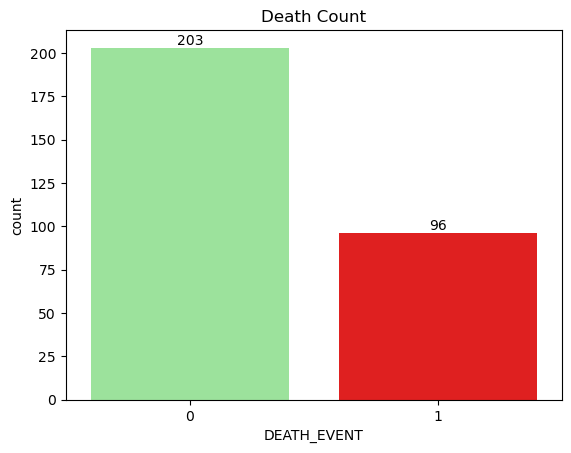

In [6]:
# Plot and label death event counts with a title
cols= ["#90ee90","#FF0000"]
ax = sns.countplot(x= data_set["DEATH_EVENT"], palette= cols)
ax.bar_label(ax.containers[0])
ax.set(title="Death Count")

[Text(0.5, 1.0, 'Age Distribution')]

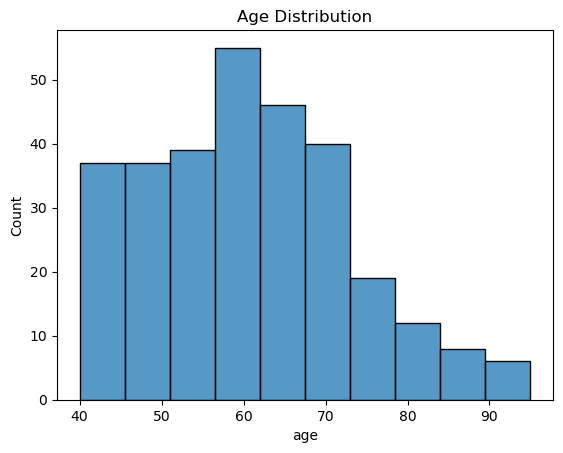

In [7]:
# Plot a histogram of the 'age' column with a title
sns.histplot(data_set['age']).set(title='Age Distribution')

[Text(0.5, 1.0, 'Ejection Fraction Distribution')]

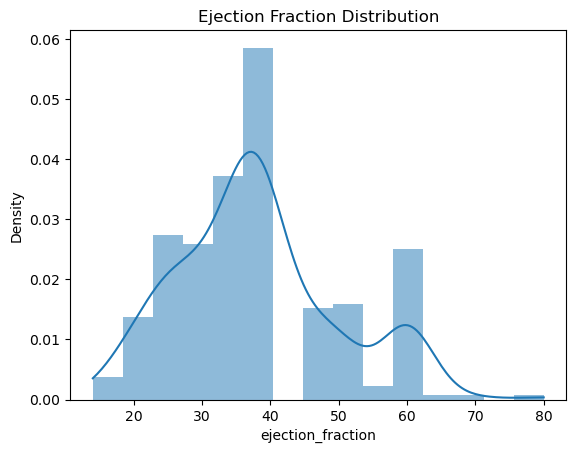

In [8]:
# Plot density and kernel density estimate (KDE) for ejection fraction distribution
sns.histplot(data_set['ejection_fraction'], kde=True, stat="density", linewidth=0).set(title='Ejection Fraction Distribution')

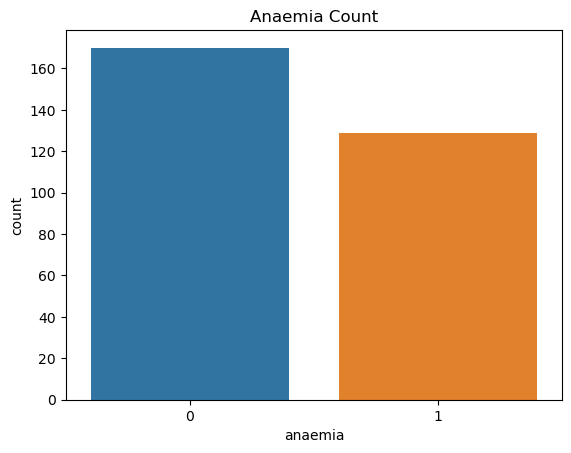

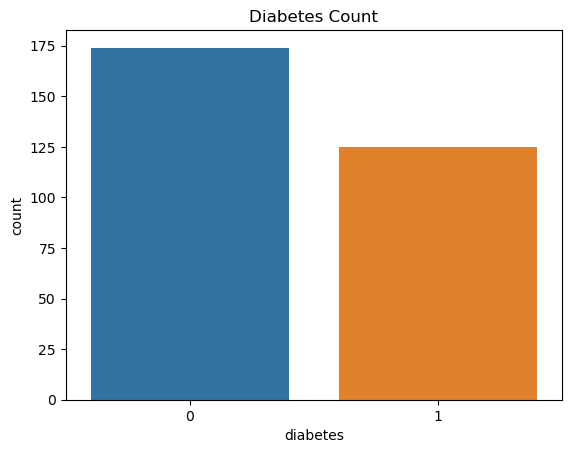

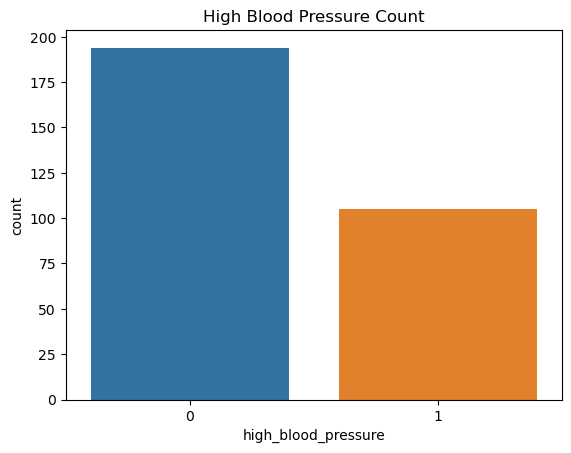

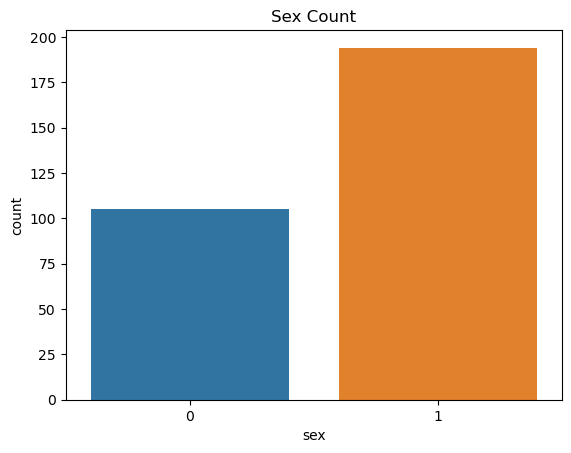

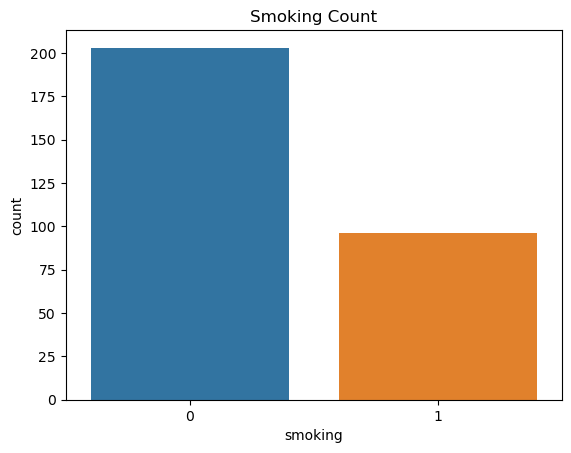

In [9]:
# Plot counts for anaemia, diabetes, high blood pressure, sex, and smoking with titles
sns.countplot(x = 'anaemia', data = data_set).set(title='Anaemia Count')
plt.show()

sns.countplot(x = 'diabetes', data = data_set).set(title='Diabetes Count')
plt.show()

sns.countplot(x = 'high_blood_pressure', data = data_set).set(title='High Blood Pressure Count')
plt.show()

sns.countplot(x = 'sex', data = data_set).set(title='Sex Count')
plt.show()

sns.countplot(x = 'smoking', data = data_set).set(title='Smoking Count')
plt.show()

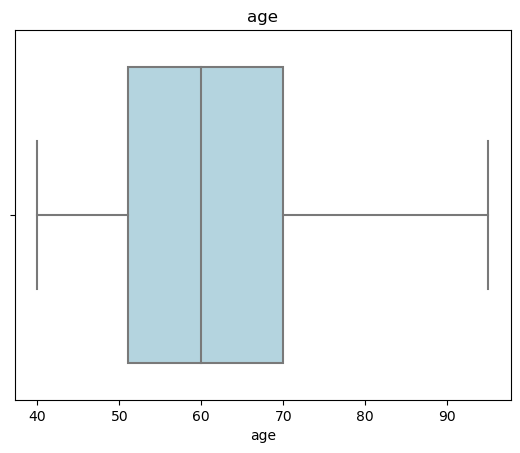

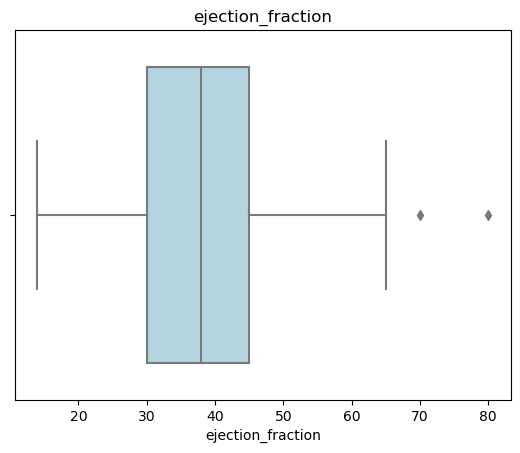

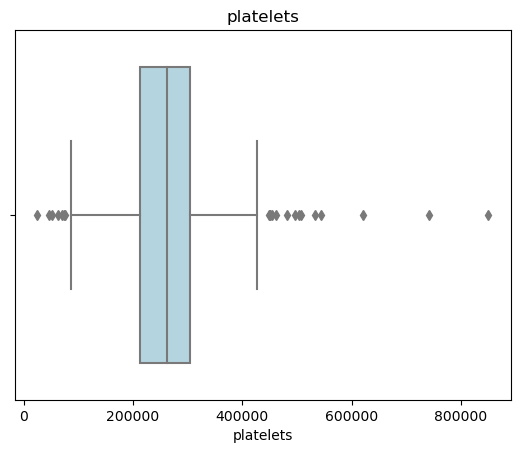

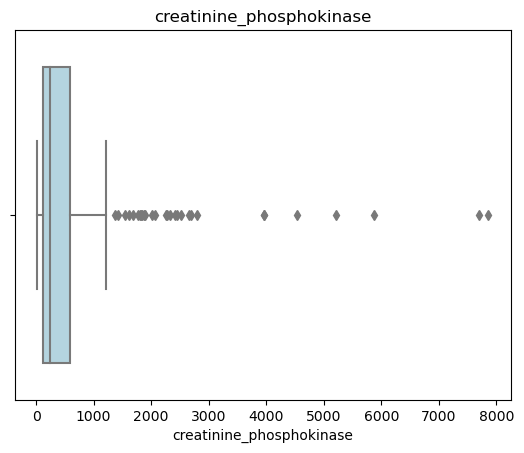

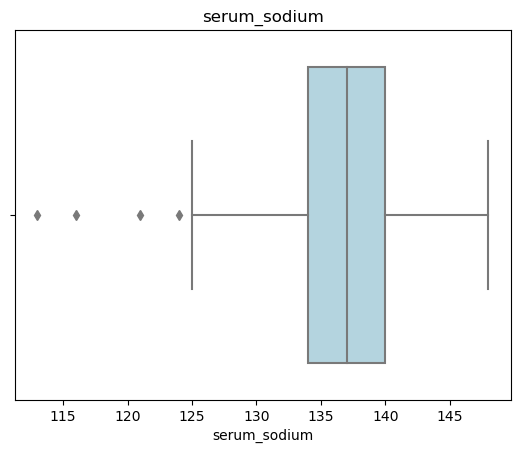

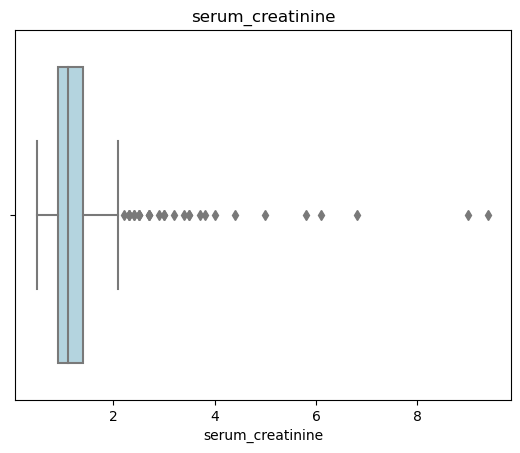

In [10]:
# Plot boxplots for selected columns to visualize distributions and outliers
cols = ['age','ejection_fraction', 'platelets', 'creatinine_phosphokinase', 'serum_sodium', 'serum_creatinine']
for col in cols:
    sns.boxplot(x = data_set[col], color = '#ADD8E6')
    plt.title(col)
    plt.show()

58.76190640394089


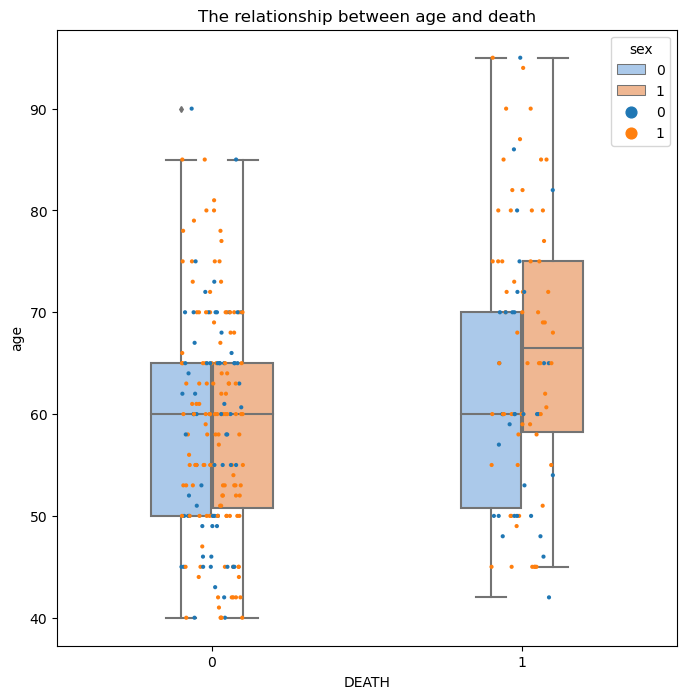

In [11]:
# Calculate mean age of survivors, plot box and strip plots for age by death event and sex, and set labels and title
fig, ax = plt.subplots(figsize = (8, 8))
survive = data_set.loc[(data_set.DEATH_EVENT == 0)].age
death = data_set.loc[(data_set.DEATH_EVENT == 1)].age
print(survive.mean())

sns.boxplot(data = data_set, x = 'DEATH_EVENT', y = 'age', hue = 'sex', width = 0.4, ax = ax, fliersize = 3, palette=sns.color_palette("pastel"))
sns.stripplot(data = data_set, x = 'DEATH_EVENT', y = 'age', hue = 'sex', size = 3, palette=sns.color_palette())
ax.set(xlabel = 'DEATH', ylabel="age", title='The relationship between age and death')
plt.show()

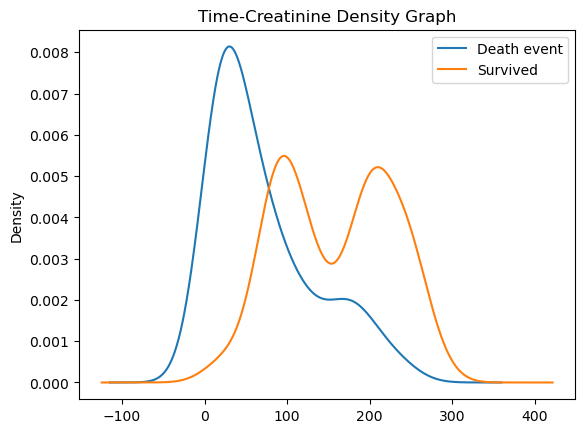

In [12]:
# Plot KDEs for time to event for both death and survival, with legend and title
data_set[data_set["DEATH_EVENT"] == True]["time"].plot.kde(label="Death event").set_title("Time-Creatinine Density Graph")
data_set[data_set["DEATH_EVENT"] == False]["time"].plot.kde(label="Survived")
plt.legend()

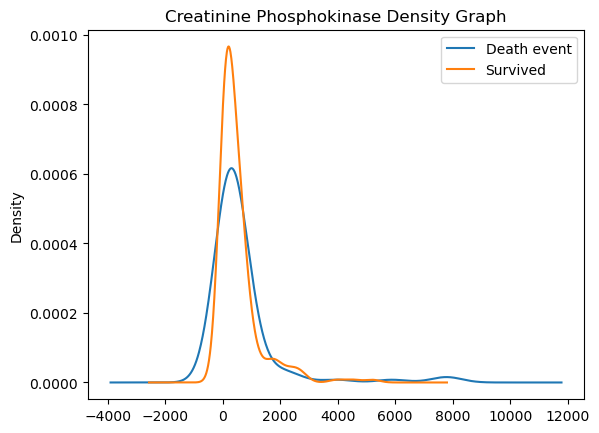

In [13]:
# Plot KDEs for creatinine phosphokinase levels by death event, with legend and title
data_set[data_set["DEATH_EVENT"] == True]["creatinine_phosphokinase"].plot.kde(label="Death event").set_title("Creatinine Phosphokinase Density Graph")
data_set[data_set["DEATH_EVENT"] == False]["creatinine_phosphokinase"].plot.kde(label="Survived")
plt.legend()

[Text(0.5, 1.0, 'Relationship between Serum Creatinine and Death')]

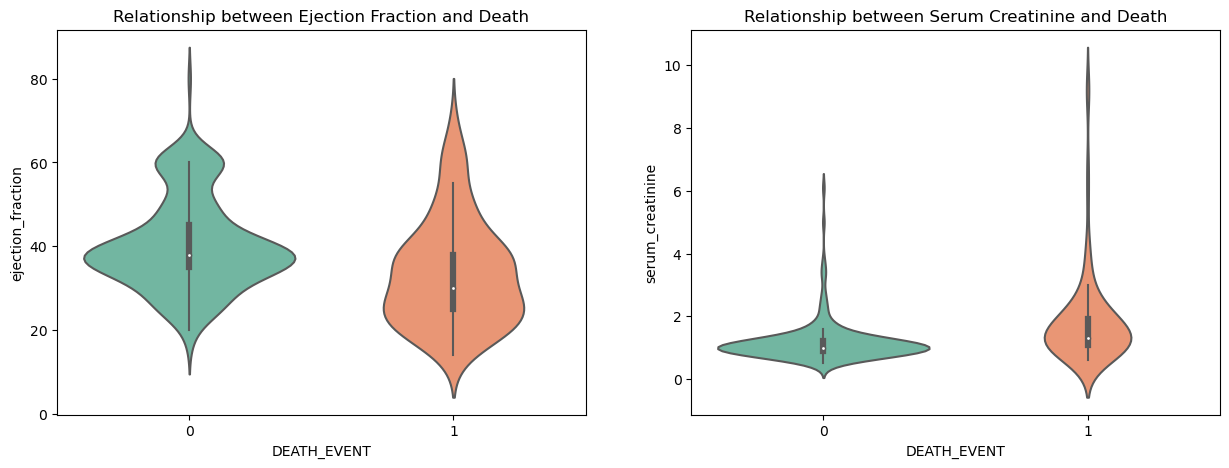

In [14]:
# Plot violin plots to show distributions of ejection fraction and serum creatinine by death event, with titles
fig, ax = plt.subplots(ncols=2, figsize = (15, 5))
sns.violinplot(data=data_set, x='DEATH_EVENT', y='ejection_fraction', ax=ax[0], palette=sns.color_palette('Set2')).set(title='Relationship between Ejection Fraction and Death')
sns.violinplot(data=data_set, x='DEATH_EVENT', y='serum_creatinine', ax=ax[1], palette=sns.color_palette('Set2')).set(title='Relationship between Serum Creatinine and Death')

[Text(0.5, 1.0, 'Relationship between Platelets and Death')]

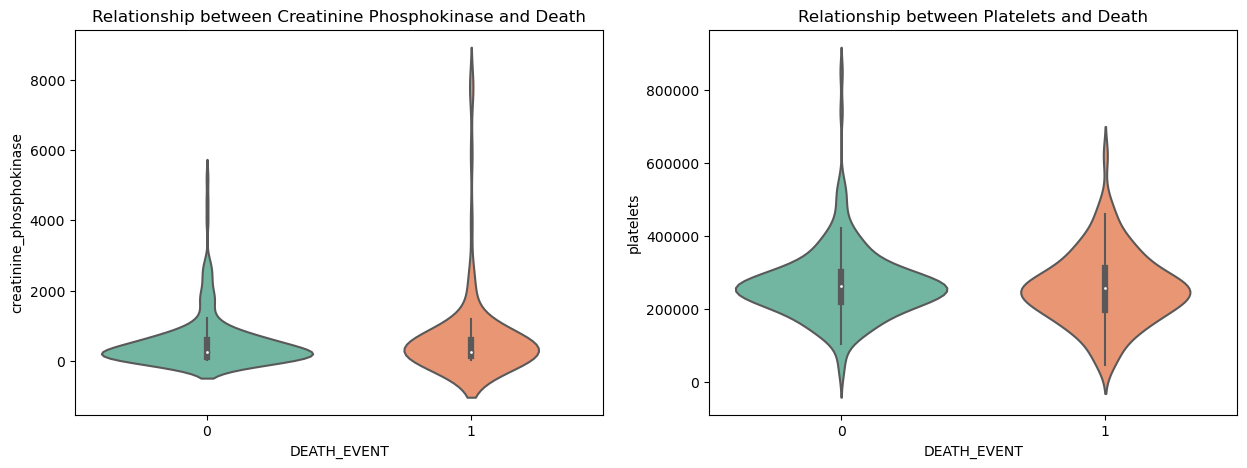

In [15]:
# Plot violin plots for creatinine phosphokinase and platelets by death event, with titles
fig, ax = plt.subplots(ncols=2, figsize = (15, 5))
sns.violinplot(data=data_set, x='DEATH_EVENT', y='creatinine_phosphokinase', ax=ax[0], palette=sns.color_palette('Set2')).set(title='Relationship between Creatinine Phosphokinase and Death')
sns.violinplot(data=data_set, x='DEATH_EVENT', y='platelets', ax=ax[1], palette=sns.color_palette('Set2')).set(title='Relationship between Platelets and Death')

Total number of Died with diabetes:- 40
Total number of Not died with diabetes: 118


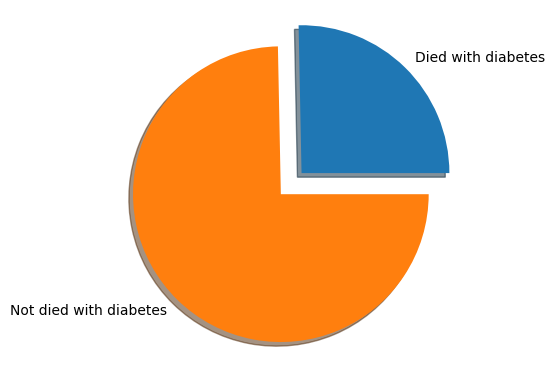

In [16]:
# Calculate and print counts for patients with and without diabetes who died, then plot a pie chart with labels and explode effect
patient_nhave_diabetes_0 = data_set['DEATH_EVENT'][data_set.diabetes == 0][data_set.DEATH_EVENT ==0]
patient_have_diabetes_1 = data_set['DEATH_EVENT'][data_set.diabetes == 1][data_set.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = np.array([len_d_died, len_d_alive])
labels = ['Died with diabetes', 'Not died with diabetes']

print(f'Total number of Died with diabetes:- {len_d_died}')
print(f'Total number of Not died with diabetes: {len_d_alive}')

plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

Total number of Died above 50yrs:- 85
Total number of Not Died above 50yrs:- 167


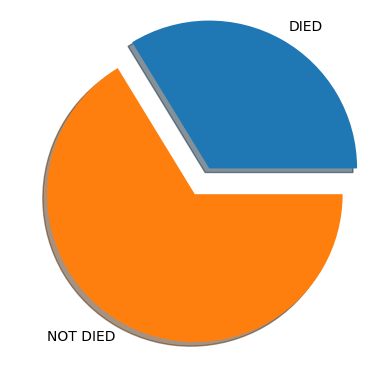

In [17]:
# Count and print numbers for patients above 50 years by death status, then plot a pie chart with explode effect
age_above_50_not_died = data_set['DEATH_EVENT'][data_set.age >=50][data_set.DEATH_EVENT == 0]
age_above_50_died = data_set['DEATH_EVENT'][data_set.age >= 50][data_set.DEATH_EVENT == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_died, len_not_died])
labels =['DIED','NOT DIED']

print(f'Total number of Died above 50yrs:- {len_died}')
print(f'Total number of Not Died above 50yrs:- {len_not_died}')

plt.pie(arr1, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

Total number of Died with smoking:- 40
Total number of Not died with smoking: 118


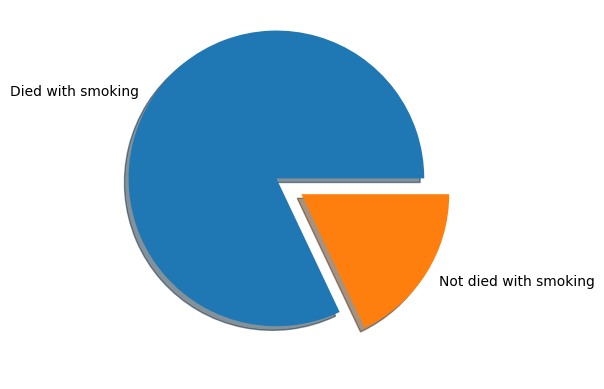

In [18]:
# Count and print numbers for smokers and non-smokers by death status, then plot a pie chart with labels and shadow effect
patient_nsmoker = data_set['DEATH_EVENT'][data_set.smoking == 0][data_set.DEATH_EVENT == 0]
patient_smoker = data_set['DEATH_EVENT'][data_set.smoking == 1][data_set.DEATH_EVENT == 1]

len_s_died = len(patient_nsmoker)
len_s_alive = len(patient_smoker)

arr2 = np.array([len_s_died, len_s_alive])
labels = ['Died with smoking', 'Not died with smoking']

print(f'Total number of Died with smoking:- {len_d_died}')
print(f'Total number of Not died with smoking: {len_d_alive}')

plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

[Text(0.5, 1.0, 'Kernel Density Estimation (kde plot)" of time and age')]

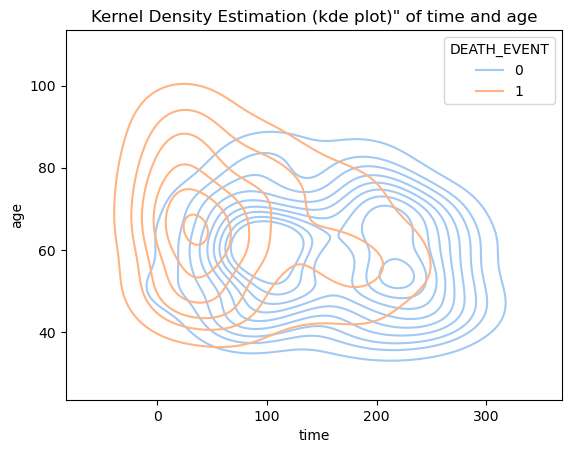

In [19]:
# Plot a KDE of time vs age colored by death event with a title
sns.kdeplot(x=data_set["time"], y=data_set["age"], hue =data_set["DEATH_EVENT"], palette='pastel').set(title='Kernel Density Estimation (kde plot)" of time and age')

[Text(0.5, 1.0, 'Kernel Density Estimation (kde plot)" of platelets and age')]

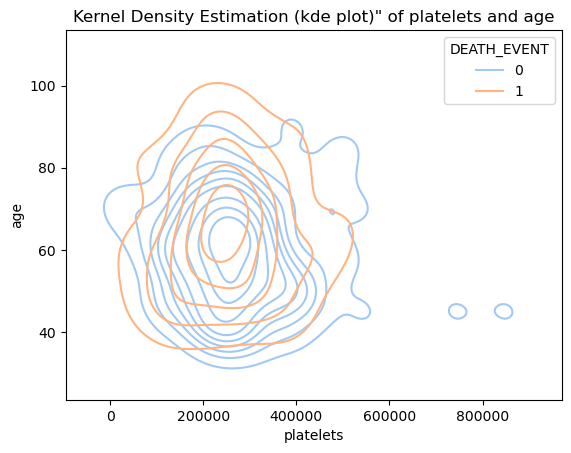

In [20]:
# Plot a KDE of platelets vs age colored by death event with a title
sns.kdeplot(x=data_set["platelets"], y=data_set["age"], hue =data_set["DEATH_EVENT"], palette='pastel').set(title='Kernel Density Estimation (kde plot)" of platelets and age')

Relationship between Age, Creatinine Phosphokinase, Serum Creatinine, Serum Sodium, Death


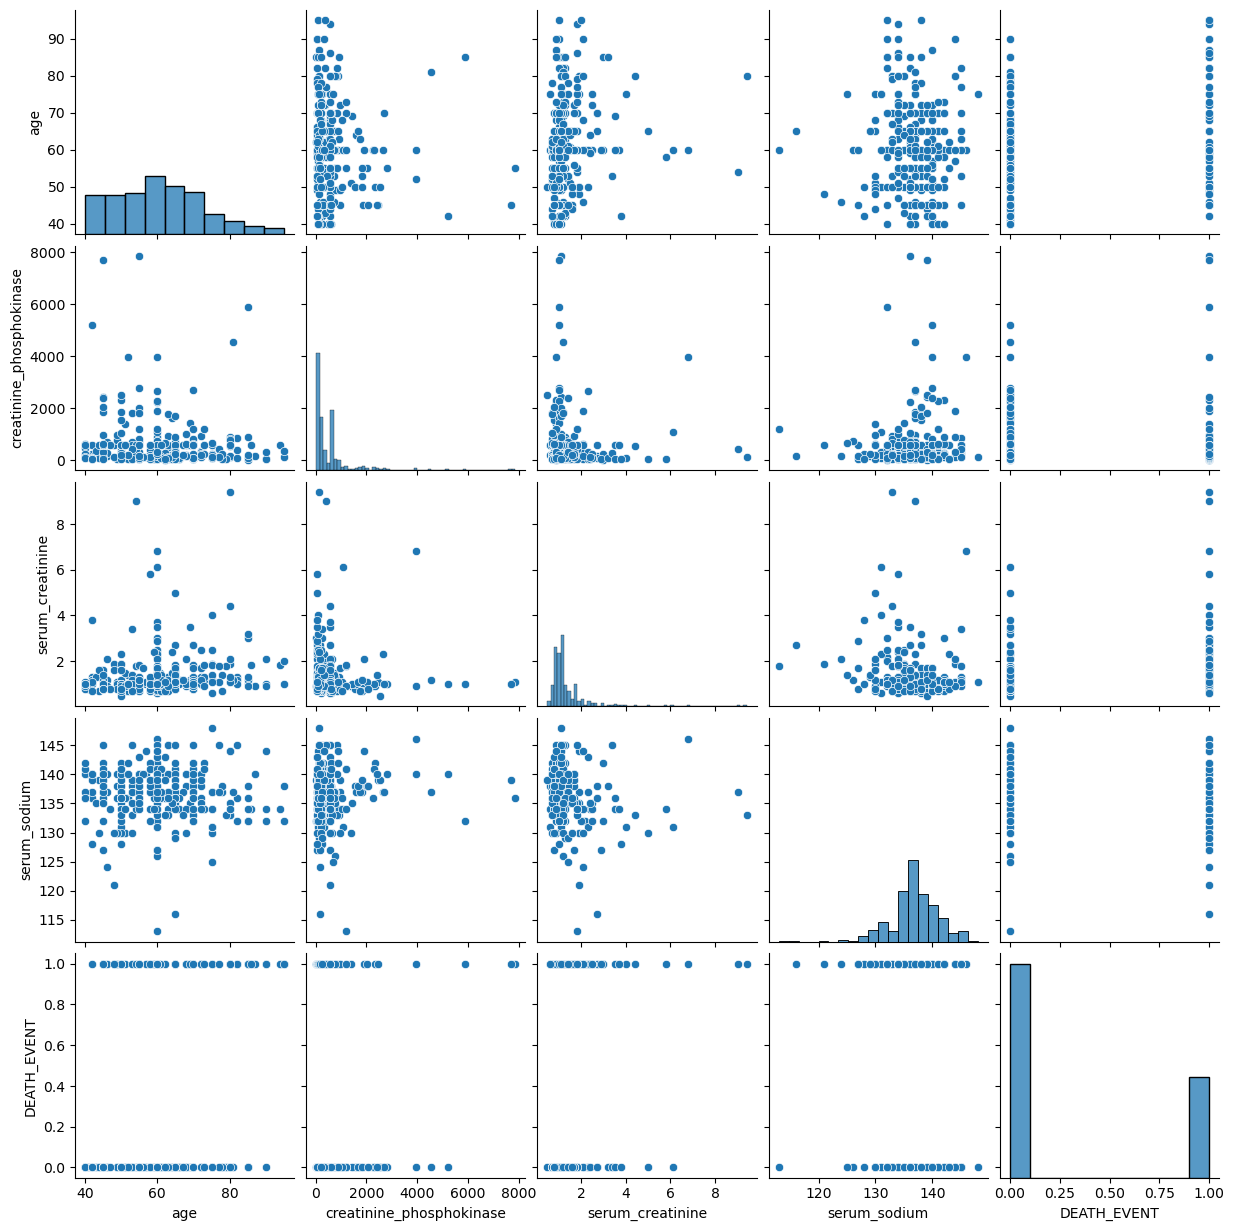

In [21]:
# Print the relationship statement and plot pair relationships in dataset subset with PairPlot
subData = data_set[['age','creatinine_phosphokinase','serum_creatinine','serum_sodium','DEATH_EVENT']]
print('Relationship between Age, Creatinine Phosphokinase, Serum Creatinine, Serum Sodium, Death')
sns.pairplot(subData)

[Text(0.5, 1.0, 'Heart Failure Correlation Heatmap')]

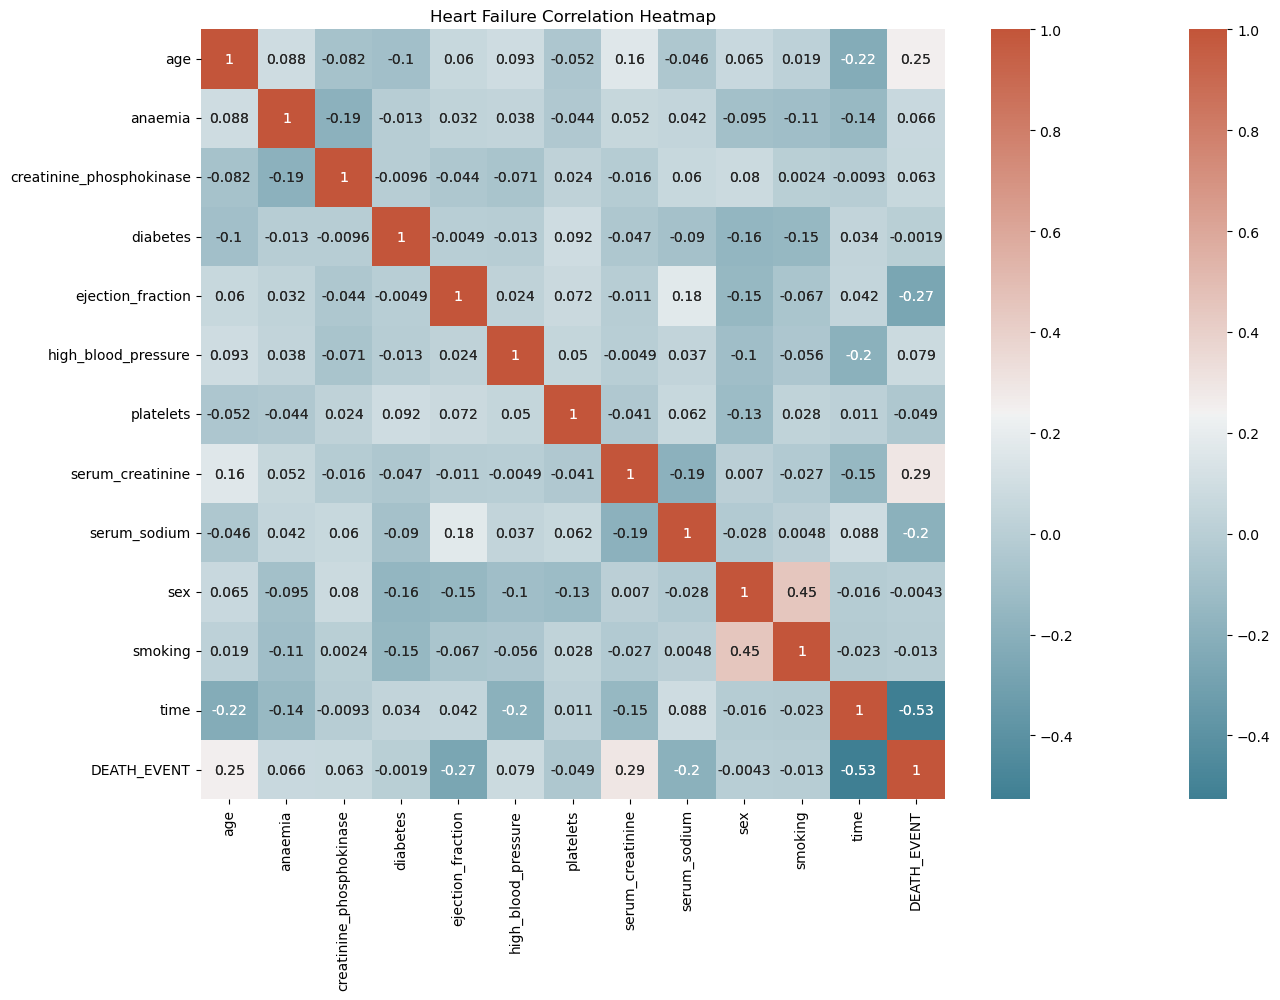

In [22]:
# Generate and plot a correlation heatmap with annotations for the heart failure dataset, including a title
corr = data_set.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
sns.heatmap(corr, xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap=sns.diverging_palette(220, 20, as_cmap=True)).set(title='Heart Failure Correlation Heatmap')

## 3. Data Modeling

### 3.1 Feature Scaling

In [23]:
# Classify features as discrete or continuous, excluding 'DEATH_EVENT' used as a label, then print classifications
discrete_features, continuous_features = [], []
for feature in data_set.columns:
    if feature == 'DEATH_EVENT':
        label = feature
    elif len(data_set[feature].unique()) > 2:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)

print(' Discrete: ', discrete_features, '\n', 'Continuous:', continuous_features, '\n', 'Label:', label)

 Discrete:  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'] 
 Continuous: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] 
 Label: DEATH_EVENT


In [24]:
data_set[discrete_features].head()

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,1,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,0,0,1,0
4,1,1,0,0,0


In [25]:
data_set[continuous_features].head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [26]:
# Scale continuous features to a range of 0 to 1, convert to DataFrame, and display the first few rows
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(data_set[continuous_features])
scaled_continuous_features = scaler.transform(data_set[continuous_features])
scaled_continuous_features = pd.DataFrame(data=scaled_continuous_features, columns=['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time' ])
scaled_continuous_features.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.636364,0.071319,0.090909,0.290823,0.157303,0.485714,0.000000
1,0.272727,1.000000,0.363636,0.288833,0.067416,0.657143,0.007117
2,0.454545,0.015693,0.090909,0.165960,0.089888,0.457143,0.010676
3,0.181818,0.011227,0.090909,0.224148,0.157303,0.685714,0.010676
4,0.454545,0.017479,0.090909,0.365984,0.247191,0.085714,0.014235


In [27]:
# Combine scaled continuous features with discrete features and the label, then summarize the scaled dataset
scaled_data = pd.concat([data_set[discrete_features], scaled_continuous_features, data_set['DEATH_EVENT']], axis=1)
scaled_data.describe()

,anaemia,diabetes,high_blood_pressure,sex,smoking,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.431438,0.418060,0.351171,0.648829,0.32107,0.378798,0.071299,0.364903,0.288833,0.100436,0.675012,0.449327,0.32107
std,0.496107,0.494067,0.478136,0.478136,0.46767,0.216269,0.123793,0.179316,0.118565,0.116237,0.126071,0.276207,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.200000,0.011929,0.242424,0.227179,0.044944,0.600000,0.245552,0.00000
50%,0.000000,0.000000,0.000000,1.000000,0.00000,0.363636,0.028961,0.363636,0.287186,0.067416,0.685714,0.395018,0.00000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,0.545455,0.071319,0.469697,0.337495,0.101124,0.771429,0.708185,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [28]:
# Split the dataset into training and testing sets, stratifying by the 'DEATH_EVENT' column, with a 30% test size and a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(scaled_data.iloc[:,:-1], scaled_data.iloc[:,-1], stratify = scaled_data['DEATH_EVENT'], test_size=0.3, random_state=42)

In [29]:
# Print the distribution of 'DEATH_EVENT' across the entire dataset, training set (70%), and test set (30%)
num_all = np.unique(scaled_data['DEATH_EVENT'], return_counts=True)
print('             The number of DEATH_EVENT')
print('                   0        |      1')
print('------------------------------------------')
print('All dataset      ', num_all[1][0], ' '*5, '|', ' '*4, num_all[1][1])
num_train = np.unique(y_train, return_counts=True)
print('Train set (70%)  ', num_train[1][0], ' '*5, '|', ' '*4, num_train[1][1])
num_test = np.unique(y_test, return_counts=True)
print('Test set (30%)    ', num_test[1][0], ' '*5, '|', ' '*4, num_test[1][1])

             The number of DEATH_EVENT
                   0        |      1
------------------------------------------
All dataset       203       |      96
Train set (70%)   142       |      67
Test set (30%)     61       |      29


### 3.2 Decision Tree

In [30]:
# Train a Decision Tree Classifier on the training set and print its maximum depth
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(criterion='gini')
tree_clf = tree_clf.fit(X_train, y_train)
print('The maximum depth of the tree is ', tree_clf.get_depth())

The maximum depth of the tree is  8


In [31]:
# Evaluate Decision Tree Classifier with varying depths, printing train, test, and cross-validation accuracies
accuracies = []
print('Depth', ' Train Accuracy', ' Test Accuracy', ' CV Accuracy')

for d in range(1,9):
    tree_clf = DecisionTreeClassifier(criterion='gini', max_depth = d)
    tree_clf = tree_clf.fit(X_train, y_train)
    
    train_accuracy = tree_clf.score(X_train, y_train)
    test_accuracy = tree_clf.score(X_test, y_test)
    
    cv_accuracy = np.mean(cross_val_score(tree_clf, X_train, y_train, cv=5))
    accuracies.append([d, train_accuracy, test_accuracy, cv_accuracy])
    
    print(' ', d, ' '*6, '%.4f' % train_accuracy, ' '*8, '%.4f'% test_accuracy, ' '*5, '%.4f'% cv_accuracy)

Depth  Train Accuracy  Test Accuracy  CV Accuracy
  1        0.8565          0.8222       0.8470
  2        0.8565          0.8222       0.8325
  3        0.8900          0.7889       0.7897
  4        0.9139          0.8222       0.7659
  5        0.9522          0.7778       0.7705
  6        0.9761          0.7333       0.7755
  7        0.9904          0.7556       0.7704
  8        1.0000          0.7778       0.7463


Text(0.5, 1.0, 'The relationship between the depth of the tree and accuracies')

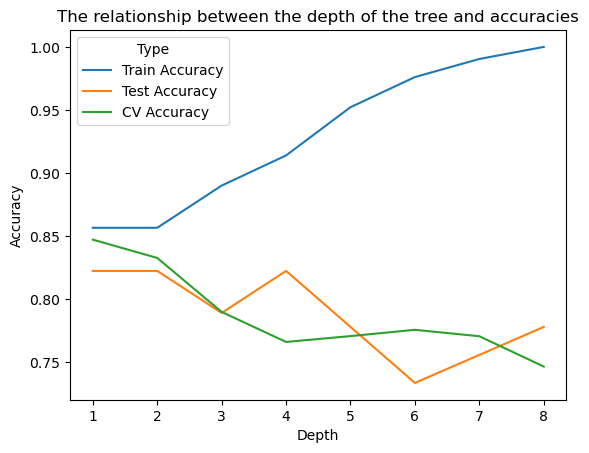

In [32]:
# Convert accuracy data to long format and plot the relationship between tree depth and accuracies for training, testing, and cross-validation
accuracies = pd.DataFrame( 
    data = accuracies, 
    columns = ['Depth', 'Train Accuracy','Test Accuracy', 'CV Accuracy']
)    

accuracies = pd.melt(
    accuracies,
    id_vars = ['Depth'],
    var_name = 'Type',
    value_name = 'Accuracy'
) 
sns.lineplot(
    x = 'Depth',
    y = 'Accuracy',
    hue = 'Type',
    data = accuracies,

).set_title('The relationship between the depth of the tree and accuracies')

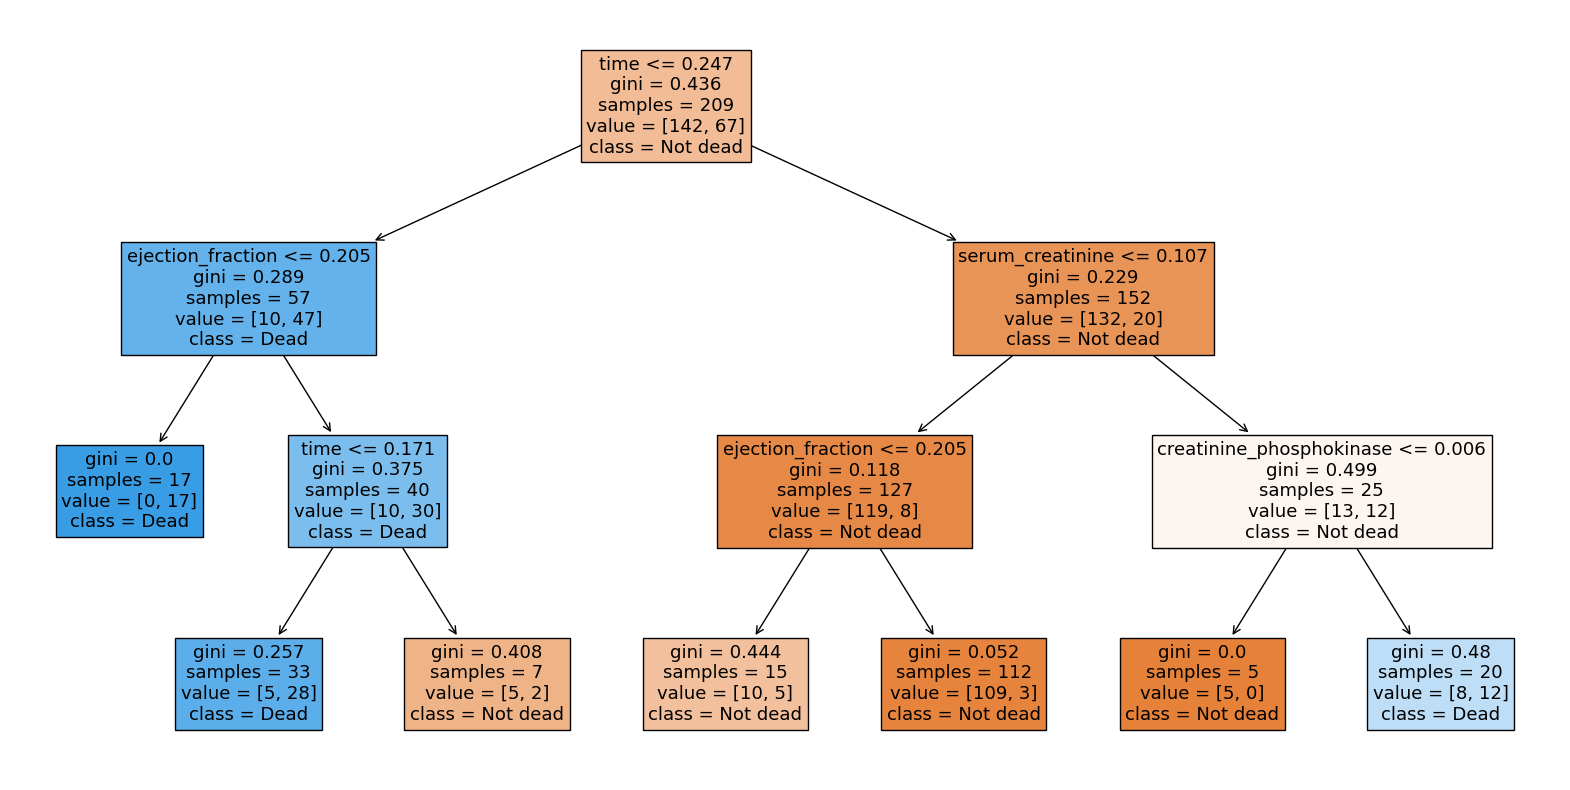

In [33]:
# Fit a Decision Tree Classifier with a max depth of 3, then plot the tree with feature names and class names, adjusting for readability
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree_clf = tree_clf.fit(X_train,y_train)
plt.subplots(figsize=(20,10))
plot_tree(tree_clf, fontsize=13, feature_names=scaled_data.columns, class_names=['Not dead', 'Dead'], filled=True)
plt.show()

### 3.4 Random Forest

In [34]:
# Evaluate RandomForestClassifier with varying depths, printing train, test, and cross-validation accuracies
from sklearn.ensemble import RandomForestClassifier
accuracies = []
print('Depth', ' Train Accuracy', ' Test Accuracy', ' CV Accuracy')

for d in range(1,8):
    rf_clf = RandomForestClassifier(n_estimators=100, max_depth=d, criterion='gini', random_state=42)
    rf_clf = rf_clf.fit(X_train, y_train)
    
    train_accuracy = rf_clf.score(X_train, y_train)
    test_accuracy = rf_clf.score(X_test, y_test)
    cv_accuracy = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=5))
    accuracies.append([d, train_accuracy, test_accuracy, cv_accuracy])
    
    print(' ', d, ' '*6, '%.4f' % train_accuracy, ' '*8, '%.4f'% test_accuracy, ' '*5, '%.4f'% cv_accuracy )

Depth  Train Accuracy  Test Accuracy  CV Accuracy
  1        0.7512          0.7222       0.7372
  2        0.8708          0.8000       0.8136
  3        0.9187          0.8333       0.8613
  4        0.9426          0.8556       0.8518
  5        0.9569          0.8111       0.8708
  6        0.9761          0.8222       0.8423
  7        1.0000          0.8444       0.8518


Text(0.5, 1.0, 'The relationship between the depth of the tree and accuracies')

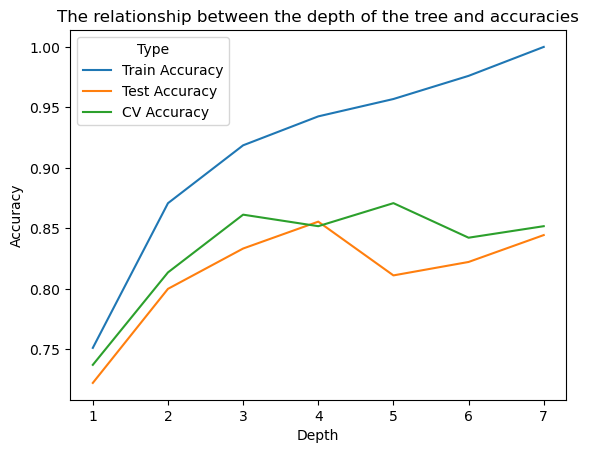

In [35]:
# Convert accuracy data for RandomForestClassifier to long format and plot the relationship between tree depth and accuracies for training, testing, and cross-validation
accuracies = pd.DataFrame( 
    data = accuracies, 
    columns = ['Depth', 'Train Accuracy','Test Accuracy', 'CV Accuracy']
)    

accuracies = pd.melt(
    accuracies,
    id_vars = ['Depth'],
    var_name = 'Type',
    value_name = 'Accuracy'
) 
sns.lineplot(
    x = 'Depth',
    y = 'Accuracy',
    hue = 'Type',
    data = accuracies,

).set_title('The relationship between the depth of the tree and accuracies')

In [36]:
# Perform grid search to find the best parameters for RandomForestClassifier, evaluating combinations of criterion, number of estimators, and max depth
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 200, 500],
    'max_depth': [2,3,4],
}
clf_grid = GridSearchCV(estimator = RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
clf_grid.fit(X_train, y_train)
clf_grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}

In [37]:
# Printing accuracies
print('CV Accuracy: %.4f' % clf_grid.best_score_)
print('Test Accuracy: %.4f' % clf_grid.score(X_test, y_test))

CV Accuracy: 0.8662
Test Accuracy: 0.8444


Text(0.5, 1.0, 'Feature Importances')

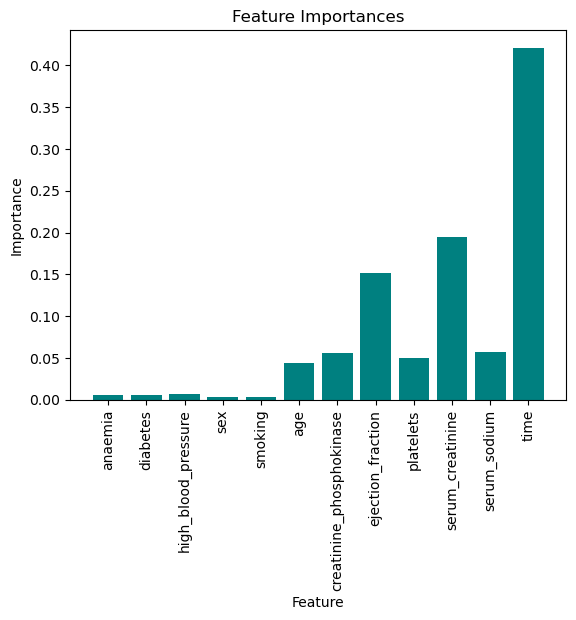

In [38]:
# Train a RandomForestClassifier with specified parameters, then plot feature importances for the trained model
rf_fi = RandomForestClassifier(n_estimators=200, max_depth=3, criterion='gini', random_state=42)
rf_fi = rf_fi.fit(X_train, y_train)

importances = list(rf_fi.feature_importances_)
scaled_data_col_name = list(scaled_data.columns[:-1].to_numpy())

plt.bar(scaled_data_col_name , importances, color='teal')
plt.xticks(ticks = scaled_data_col_name, labels = scaled_data_col_name, rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')

-----------------------------------------------

### Model Accuracy Comparison

     1. Decision Tree - 0.8470 or 84.70%
     2. Random Forest - 0.8662 or 86.62%